## Dataloader


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import seaborn as sns
import os
import glob
#import PIL.Image as Image
from PIL import Image
import torchvision.transforms as transforms


In [4]:
# Checking the number of content in the 'data' and 'labels' folder
data_dir = 'training_dataset/training_dataset'
print('Number of data:', len(os.listdir(data_dir + '/data')))
print('Number of labels:', len(os.listdir(data_dir + '/labels')))

Number of data: 500
Number of labels: 500


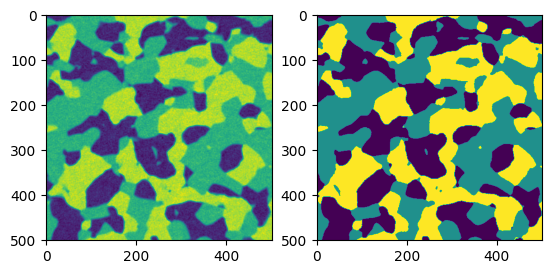

In [12]:
# Trials
data1 = Image.open('training_dataset/training_dataset/data/SOCprist0001.tiff')
label1 = Image.open('training_dataset/training_dataset/labels/slice__001.tif')
# show the image
plt.subplot(1,2,1)
plt.imshow(data1)
# suplot label 1
plt.subplot(1,2,2)
plt.imshow(label1)

In [14]:
class CustomDataset(Dataset):
    def __init__(self, data_dir):
       #self.transform = transform
        self.data_path = data_dir
        # use glob to take the labels and the data
        self.data_paths = sorted(glob.glob(self.data_path + '/data/*.tiff'))
        self.label_paths = sorted(glob.glob(self.data_path + '/labels/*.tif'))
    
    def __len__(self):
        return (len(self.data_paths),len(self.label_paths))
    
    #def __getitem__(self, idx):
    #    data_path = os.path.join(self.data_dir, 'data', self.data_files[idx])
    #    label_path = os.path.join(self.data_dir, 'labels', self.label_files[idx])
    #    
    #    data = Image.open(data+path+'SOCprist0+{idx}.tiff')
    #    label = Image.open(label+path+'slice__{idx}.tiff')
    #    
    #    return data, label
    
    def __getitem__(self, idx):
        'Generates one sample of data'
        data_path = self.data_paths[idx]
        label_path = self.label_paths[idx]
        
        data = Image.open(data_path)
        label = Image.open(label_path)
    
        plt.subplot(1,2,1)
        plt.imshow(data)
        # do a subplot for the label
        plt.subplot(1,2,2)
        plt.imshow(label)
        #Y = self.transform(label)
        #X = self.transform(image)
        
        return data,label#,X, Y



(<PIL.TiffImagePlugin.TiffImageFile image mode=I;16 size=501x501>,
 <PIL.TiffImagePlugin.TiffImageFile image mode=L size=501x501>)

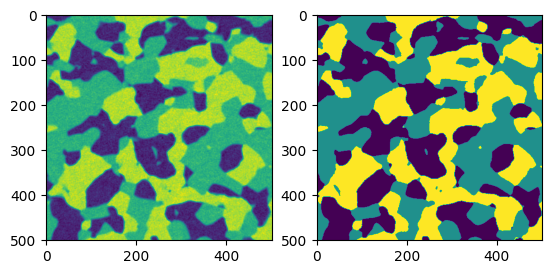

In [15]:
# Create an instance of the custom dataset
dataset = CustomDataset('training_dataset/training_dataset')
# Test dataloader : 001,002..500
dataset.__len__()
dataset.__getitem__(0)

In [ ]:
# Data loader to load the data in batches
#dataloader = DataLoader(dataset, batch_size=32, shuffle=True)